In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [2]:
fig = plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

### Load the data from your working directory into the jupyter lab

In [3]:
df = pd.read_csv("HousingData.csv")

### Clean and preprocess the data for training and evolution

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.isna().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.count()

CRIM       486
ZN         486
INDUS      486
CHAS       486
NOX        506
RM         506
AGE        486
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      486
MEDV       506
dtype: int64

### total number of null columns = 506-486 = 20

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### we are filling it with median because of int datatype and it is more relative than mean. 
### We use mode only for categorical variables

In [9]:
df["CRIM"].fillna(df["CRIM"].median(),inplace=True)

In [10]:
df.count()

CRIM       506
ZN         486
INDUS      486
CHAS       486
NOX        506
RM         506
AGE        486
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      486
MEDV       506
dtype: int64

In [11]:
df["ZN"].fillna(df["ZN"].median(),inplace=True)
df["INDUS"].fillna(df["INDUS"].median(),inplace=True)
df["CHAS"].fillna(df["CHAS"].median(),inplace=True)
df["AGE"].fillna(int(df["AGE"].median()),inplace=True)
df["LSTAT"].fillna(df["LSTAT"].median(),inplace=True)

In [12]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [14]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,76.0,2.5050,1,273,21.0,396.90,7.88,11.9


### Setting up hyperparameters

In [15]:
batch_size = 64 ## since the total dataset data is relatively small set up batchsize in terms of 2^n and small
learning_rate = 5e-7 ## setting up learning rate for sgd cost function optimization

input_size = 13 ## it contains 13 columns
output_size = 1 ## target variable MEDV

### Removing outliers

In [16]:
cols = list(df.columns)
cols.remove("CHAS")
cols

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [17]:
col_mean = df[cols].mean()
col_std = df[cols].std()

z_score = (df[cols] - col_mean)/col_std

z_threshold = 3

In [18]:
df1 = df.copy(deep=True)
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [19]:
for i in z_score:
    df1['Z_score'+str(i)]=z_score[i]

In [20]:
outliers = np.any(np.abs(z_score) > z_threshold,axis=1)
df1 = df1[~outliers]

In [21]:
df1.count()

CRIM              435
ZN                435
INDUS             435
CHAS              435
NOX               435
RM                435
AGE               435
DIS               435
RAD               435
TAX               435
PTRATIO           435
B                 435
LSTAT             435
MEDV              435
Z_scoreCRIM       435
Z_scoreZN         435
Z_scoreINDUS      435
Z_scoreNOX        435
Z_scoreRM         435
Z_scoreAGE        435
Z_scoreDIS        435
Z_scoreRAD        435
Z_scoreTAX        435
Z_scorePTRATIO    435
Z_scoreB          435
Z_scoreLSTAT      435
Z_scoreMEDV       435
dtype: int64

In [22]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,Z_scoreNOX,Z_scoreRM,Z_scoreAGE,Z_scoreDIS,Z_scoreRAD,Z_scoreTAX,Z_scorePTRATIO,Z_scoreB,Z_scoreLSTAT,Z_scoreMEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,...,-0.144075,0.413263,-0.131531,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.095110,0.159528
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,...,-0.739530,0.194082,0.367046,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.502282,-0.101424
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,...,-0.739530,1.281446,-0.280740,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.230491,1.322937
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,...,-0.834458,1.015298,-0.837544,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.385823,1.181589
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,...,-0.834458,1.227362,-0.531847,1.076671,-0.752178,-1.105022,0.112920,0.440616,-0.175942,1.486032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,...,0.157968,0.438881,0.010400,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.175942,-0.014440
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,...,0.157968,-0.234316,0.286982,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.510833,-0.210154
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,...,0.157968,0.983986,0.807394,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-1.001055,0.148655
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,...,0.157968,0.724955,0.745527,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.881350,-0.057932


### Successfully removed 506-403=103 outliers from the dataset

In [23]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


### Now let us visualize the data of the given dataset using matplotlib

In [25]:
%matplotlib inline

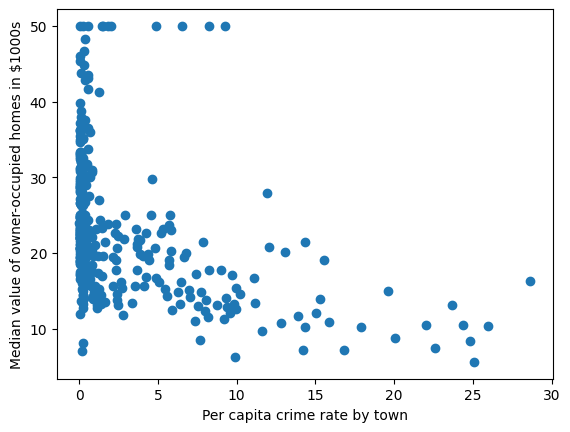

In [26]:
plt.scatter(df1["CRIM"],df1["MEDV"])
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

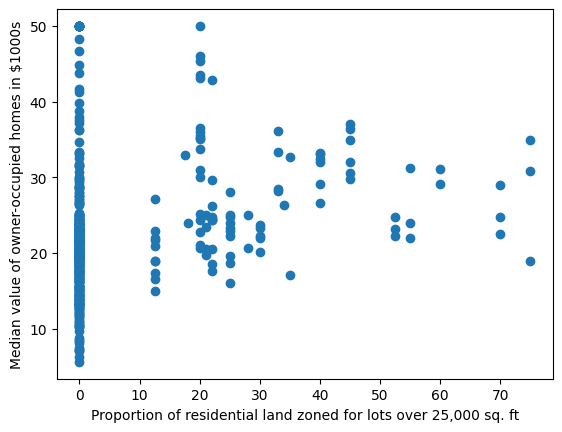

In [27]:
plt.scatter(df1["ZN"],df1["MEDV"])
plt.xlabel("Proportion of residential land zoned for lots over 25,000 sq. ft")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

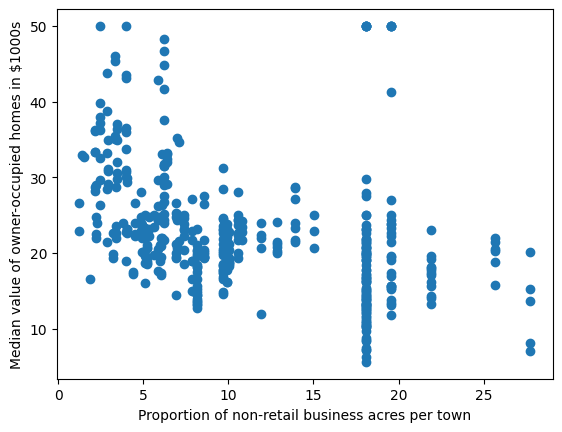

In [28]:
plt.scatter(df1["INDUS"],df1["MEDV"])
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

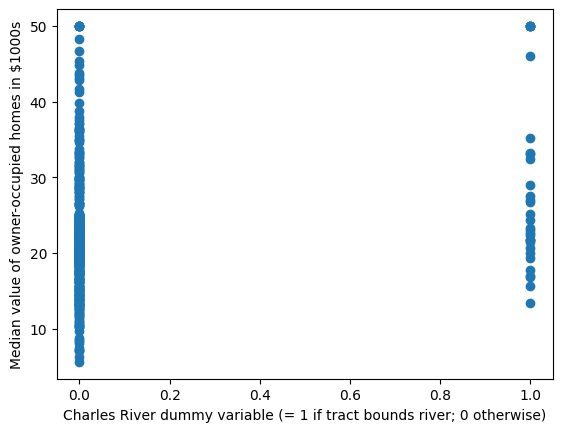

In [29]:
plt.scatter(df1["CHAS"],df1["MEDV"])
plt.xlabel("Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

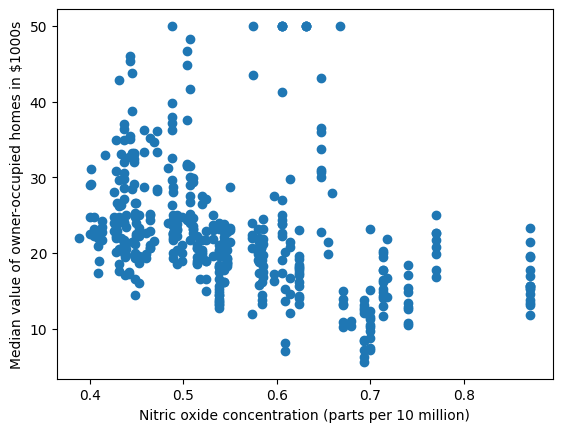

In [30]:
plt.scatter(df1["NOX"],df1["MEDV"])
plt.xlabel("Nitric oxide concentration (parts per 10 million)")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

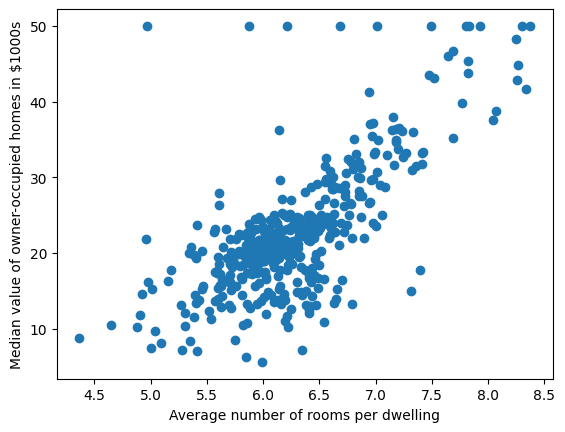

In [31]:
plt.scatter(df1["RM"],df1["MEDV"])
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

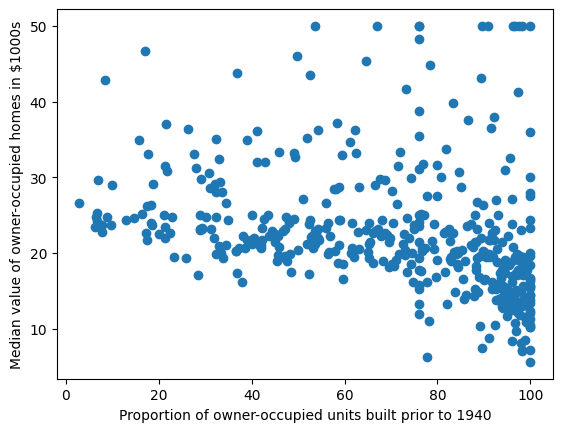

In [32]:
plt.scatter(df1["AGE"],df1["MEDV"])
plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

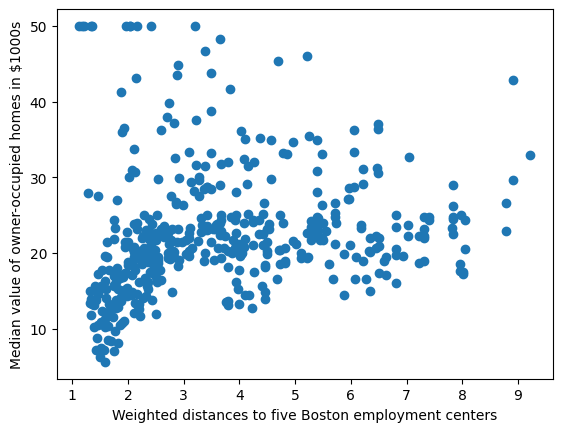

In [33]:
plt.scatter(df1["DIS"],df1["MEDV"])
plt.xlabel("Weighted distances to five Boston employment centers")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

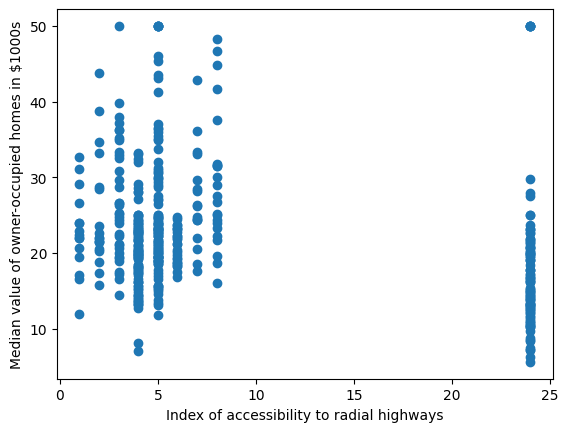

In [34]:
plt.scatter(df1["RAD"],df1["MEDV"])
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

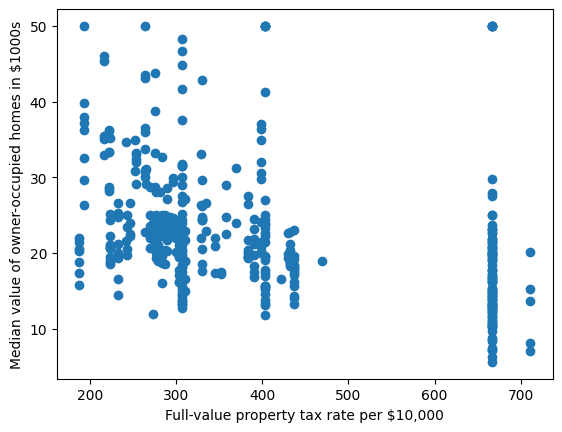

In [35]:
plt.scatter(df1["TAX"],df1["MEDV"])
plt.xlabel("Full-value property tax rate per $10,000")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

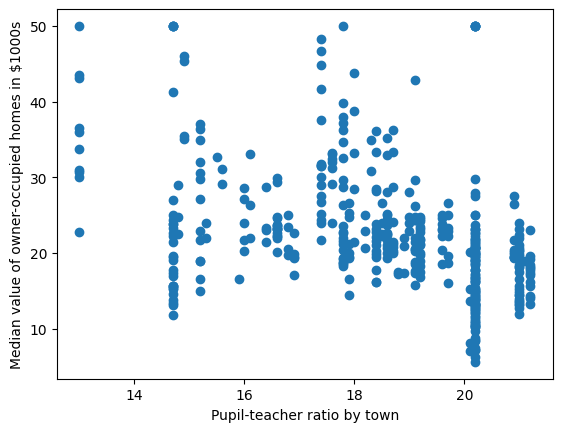

In [36]:
plt.scatter(df1["PTRATIO"],df1["MEDV"])
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

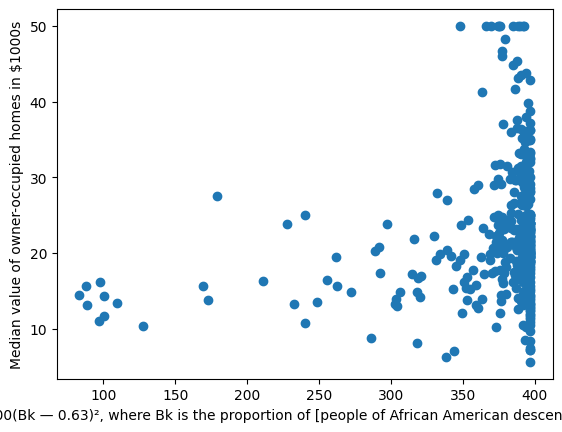

In [37]:
plt.scatter(df1["B"],df1["MEDV"])
plt.xlabel("1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

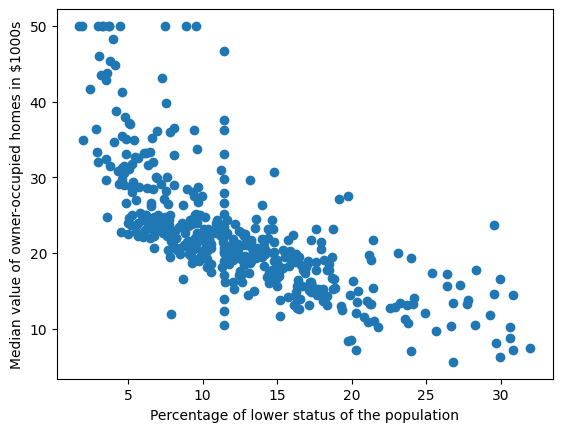

In [38]:
plt.scatter(df1["LSTAT"],df1["MEDV"])
plt.xlabel("Percentage of lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

In [39]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'Z_scoreCRIM', 'Z_scoreZN',
       'Z_scoreINDUS', 'Z_scoreNOX', 'Z_scoreRM', 'Z_scoreAGE', 'Z_scoreDIS',
       'Z_scoreRAD', 'Z_scoreTAX', 'Z_scorePTRATIO', 'Z_scoreB',
       'Z_scoreLSTAT', 'Z_scoreMEDV'],
      dtype='object')

### We have to remove the z-score column which is now used fully

In [40]:
columns_to_remove = ['Z_scoreCRIM', 'Z_scoreZN', 'Z_scoreINDUS'
                     , 'Z_scoreNOX', 'Z_scoreRM',
                    'Z_scoreAGE','Z_scoreDIS','Z_scoreRAD', 
                     'Z_scoreTAX', 'Z_scorePTRATIO', 'Z_scoreB',
                       'Z_scoreLSTAT', 'Z_scoreMEDV']
df1 = df1.drop(columns=columns_to_remove)

In [41]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


### We can also try principal component analysis for feature reduction 

In [42]:
from sklearn.decomposition import PCA
X = df1.drop(columns=['MEDV'])
pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca.shape

(435, 3)

In [43]:
pca.explained_variance_ratio_

array([0.88995277, 0.08231542, 0.01990997])

In [44]:
inputs = df1.drop('MEDV', axis=1).values
targets = df1[['MEDV']].values
inputs.shape, targets.shape

((435, 13), (435, 1))

In [45]:
dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32))
train_ds, val_ds = random_split(dataset, [335, 100])
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

In [46]:
count=0
for batch in train_loader:
    inputs, targets = batch
    # Print a few samples from the batch
    '''
    print("Training Batch:")
    print("Inputs:")
    print(inputs)
    print("Targets:")
    print(targets)'''
    count+=1
    
count

6

### We can see 6 batches of the training dataset has been created for training in randomized manner with shuffle = True

In [113]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)
    
    def forward(self, xb):
        out = self.linear(xb)
        return out
        
    def training_steps(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.mse_loss(out,targets)
        return loss
    
    def validation_steps(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.mse_loss(out,targets)
        return {'val_loss':loss.detach()}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss':epoch_loss.item()}
    
    def epoch_end(self,epoch,result):
        print(f"Epoch [{epoch}], val_loss : {result['val_loss']}")
        
    

In [114]:
model = Model()

In [115]:
def evaluate(model, val_loader):
    outputs = [model.validation_steps(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_steps(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        result = evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    return history
            
    

In [116]:
result = evaluate(model, val_loader)
result

{'val_loss': 760.6587524414062}

In [117]:
history0 = fit(10,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss : 626.8251342773438
Epoch [1], val_loss : 547.5775756835938
Epoch [2], val_loss : 456.0269470214844
Epoch [3], val_loss : 422.6629943847656
Epoch [4], val_loss : 372.4556884765625
Epoch [5], val_loss : 336.7992248535156
Epoch [6], val_loss : 290.4628601074219
Epoch [7], val_loss : 259.5716552734375
Epoch [8], val_loss : 232.0447998046875
Epoch [9], val_loss : 207.75234985351562


In [118]:
history1 = fit(4,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss : 191.36514282226562
Epoch [1], val_loss : 174.94247436523438
Epoch [2], val_loss : 163.05169677734375
Epoch [3], val_loss : 150.33421325683594


In [119]:
history2 = fit(7,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss : 143.4091339111328
Epoch [1], val_loss : 145.28662109375
Epoch [2], val_loss : 130.3580780029297
Epoch [3], val_loss : 127.3347396850586
Epoch [4], val_loss : 121.281494140625
Epoch [5], val_loss : 113.54927825927734
Epoch [6], val_loss : 109.93390655517578


In [120]:
history3 = fit(19,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss : 108.01917266845703
Epoch [1], val_loss : 106.1008529663086
Epoch [2], val_loss : 102.89427947998047
Epoch [3], val_loss : 105.1393051147461
Epoch [4], val_loss : 104.01641845703125
Epoch [5], val_loss : 99.11083984375
Epoch [6], val_loss : 97.08882141113281
Epoch [7], val_loss : 97.81769561767578
Epoch [8], val_loss : 97.67948150634766
Epoch [9], val_loss : 94.73650360107422
Epoch [10], val_loss : 92.85613250732422
Epoch [11], val_loss : 94.2328872680664
Epoch [12], val_loss : 92.53446197509766
Epoch [13], val_loss : 92.7972183227539
Epoch [14], val_loss : 93.57803344726562
Epoch [15], val_loss : 92.30560302734375
Epoch [16], val_loss : 91.38273620605469
Epoch [17], val_loss : 89.87066650390625
Epoch [18], val_loss : 90.91551971435547


In [121]:
history5 = fit(5,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss : 90.61250305175781
Epoch [1], val_loss : 89.37345886230469
Epoch [2], val_loss : 89.95033264160156
Epoch [3], val_loss : 89.20902252197266
Epoch [4], val_loss : 88.76127624511719


In [122]:
history6 = fit(20,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss : 88.5755844116211
Epoch [1], val_loss : 89.52061462402344
Epoch [2], val_loss : 90.20106506347656
Epoch [3], val_loss : 88.88968658447266
Epoch [4], val_loss : 87.4377212524414
Epoch [5], val_loss : 88.22454071044922
Epoch [6], val_loss : 87.31853485107422
Epoch [7], val_loss : 87.8733139038086
Epoch [8], val_loss : 86.6177749633789
Epoch [9], val_loss : 87.67455291748047
Epoch [10], val_loss : 87.6800765991211
Epoch [11], val_loss : 86.77197265625
Epoch [12], val_loss : 86.9729232788086
Epoch [13], val_loss : 87.47236633300781
Epoch [14], val_loss : 90.57501220703125
Epoch [15], val_loss : 88.03121185302734
Epoch [16], val_loss : 85.76032257080078
Epoch [17], val_loss : 86.1960220336914
Epoch [18], val_loss : 89.58924865722656
Epoch [19], val_loss : 87.11724853515625


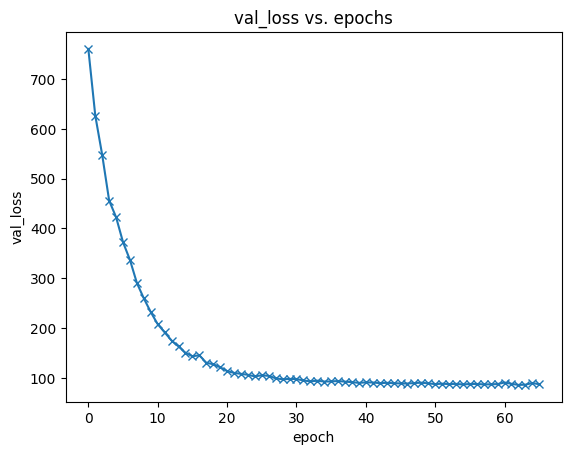

In [123]:
losses = [r['val_loss'] for r in [result] + history0 + history1 + history2 + history3 + history5 + history6]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

In [124]:
def predict(x,model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [125]:
x, target = val_ds[64]
pred = predict(x,model)
print("Input : ", x)
print("Target : ",target)
print("Predictions : ",pred)

Input :  tensor([8.1870e-02, 0.0000e+00, 2.8900e+00, 0.0000e+00, 4.4500e-01, 7.8200e+00,
        3.6900e+01, 3.4952e+00, 2.0000e+00, 2.7600e+02, 1.8000e+01, 3.9353e+02,
        3.5700e+00])
Target :  tensor([43.8000])
Predictions :  21.30954360961914


In [129]:
torch.save(model.state_dict(),'housing-linear.pth')